In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
raw_data=pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
raw_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
def select_binary_cat_features(data):
    cat_var=[]
    for column in data.columns:
        if data[column].nunique()==2:
            cat_var.append(column)
    return cat_var
binary_cat_features=select_binary_cat_features(raw_data)
print(binary_cat_features)

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


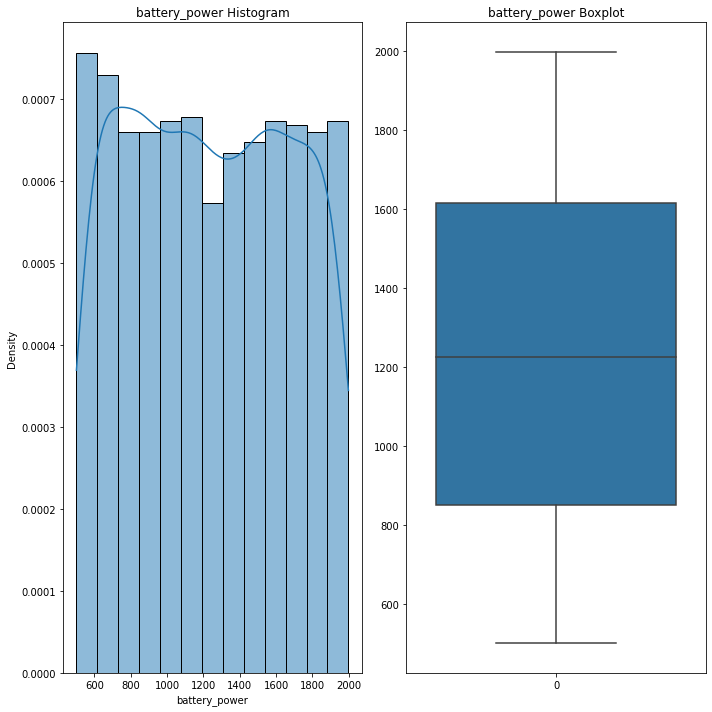

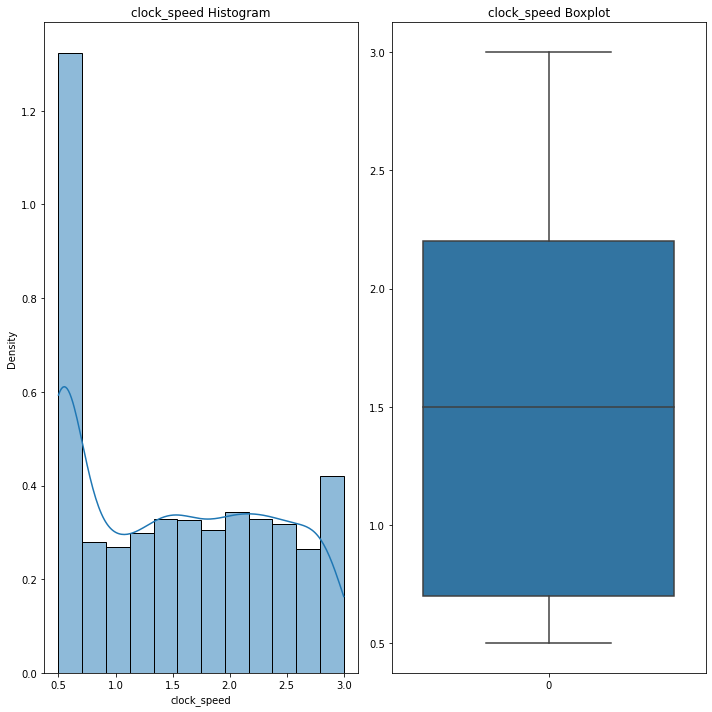

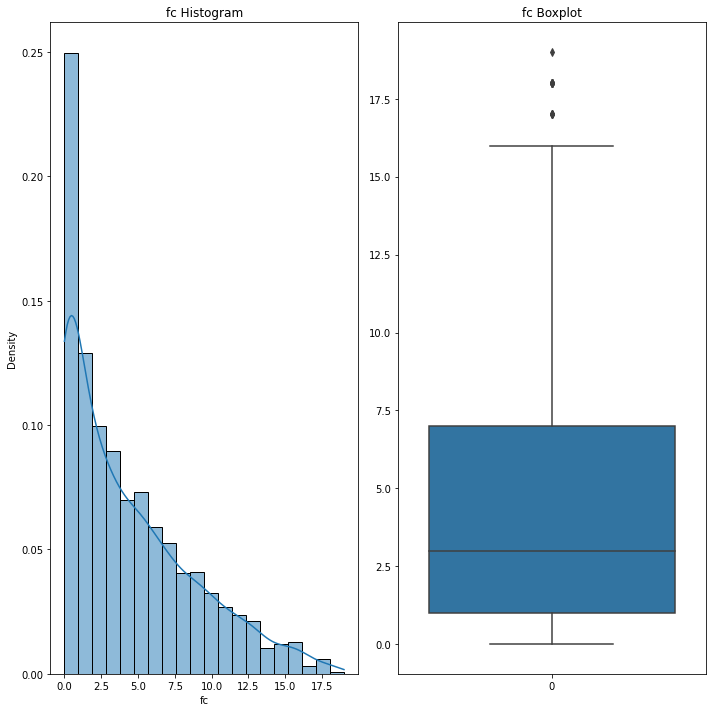

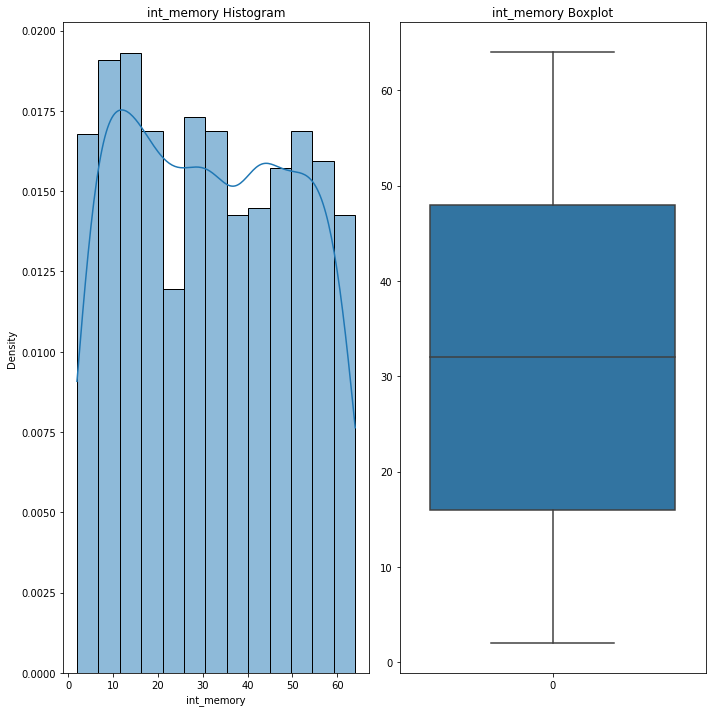

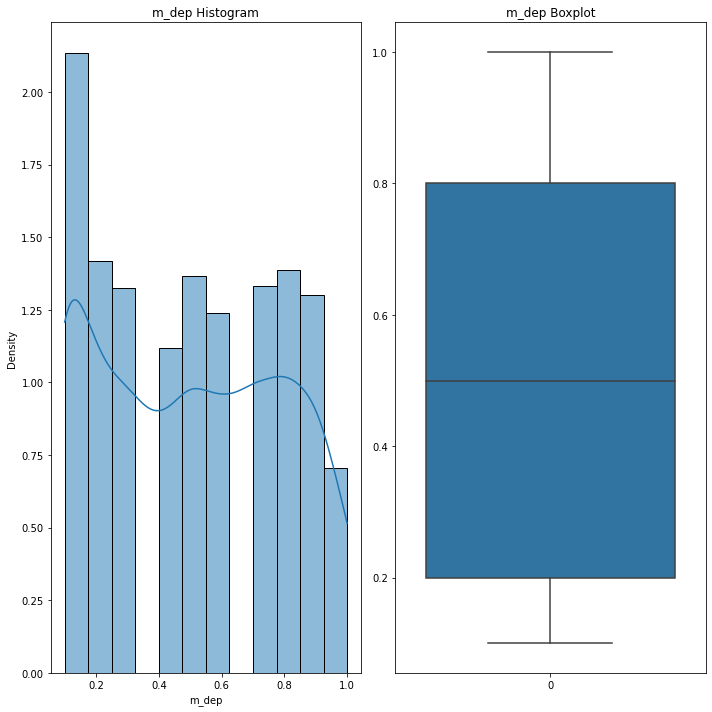

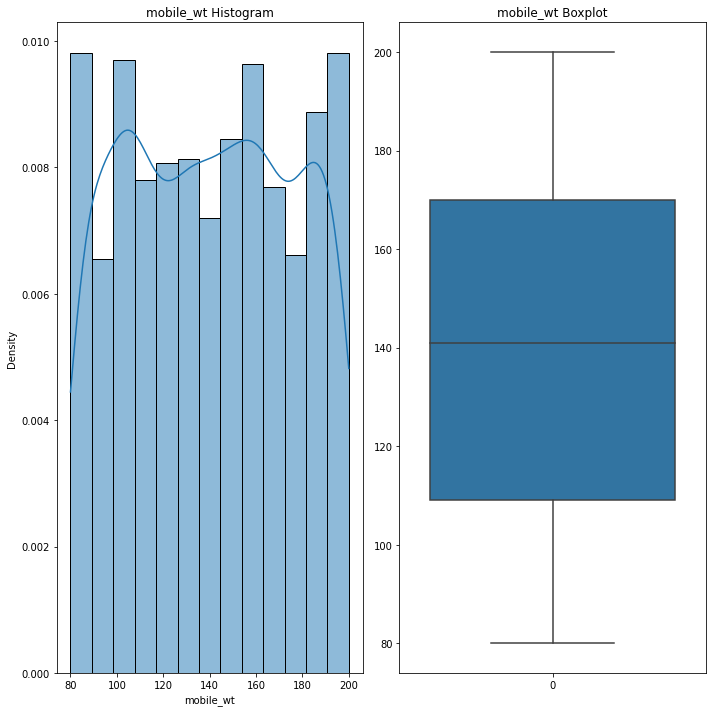

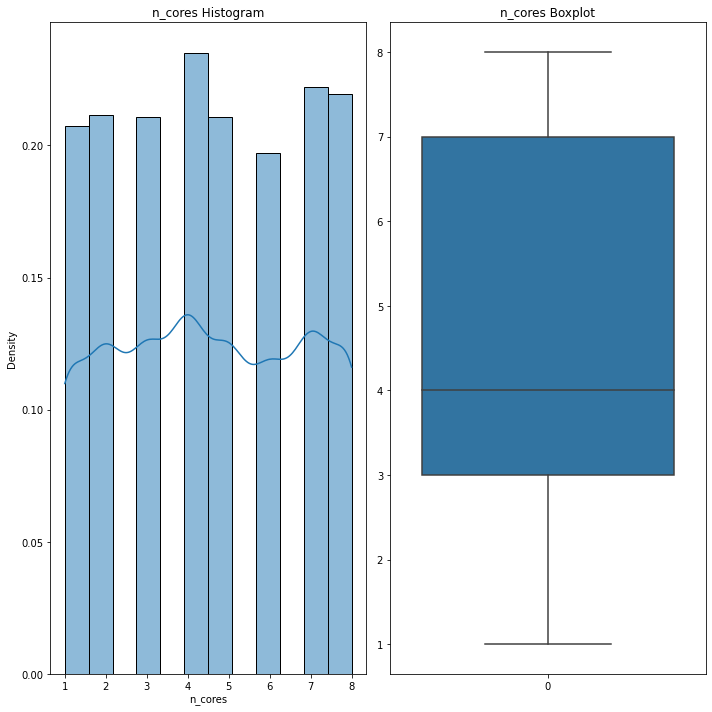

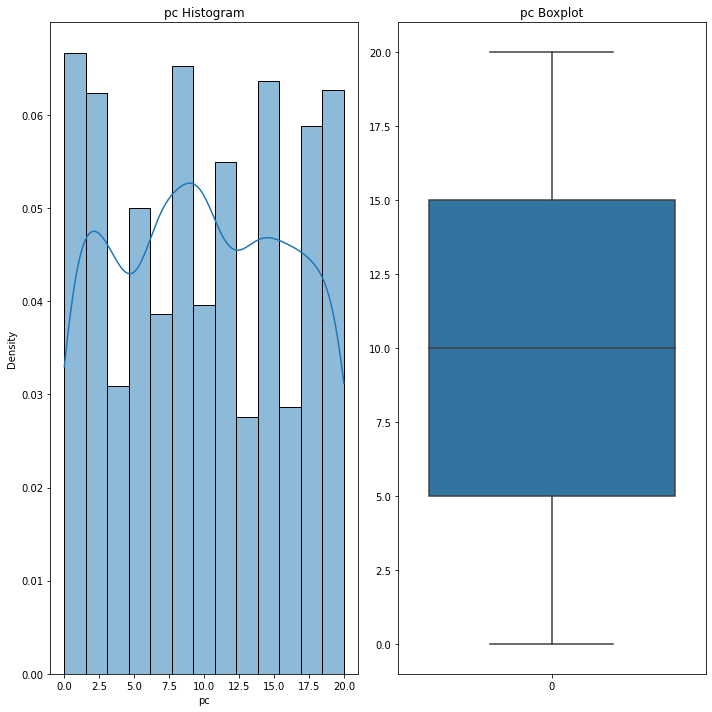

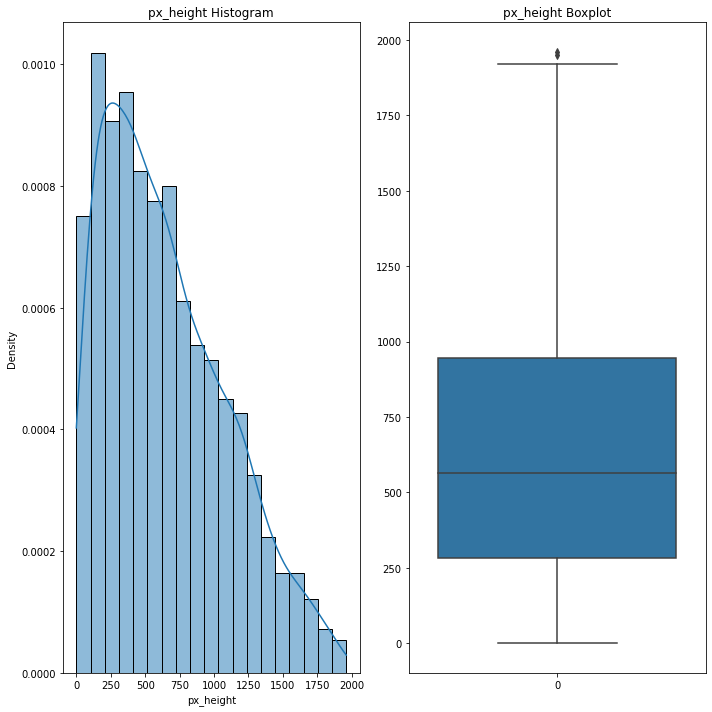

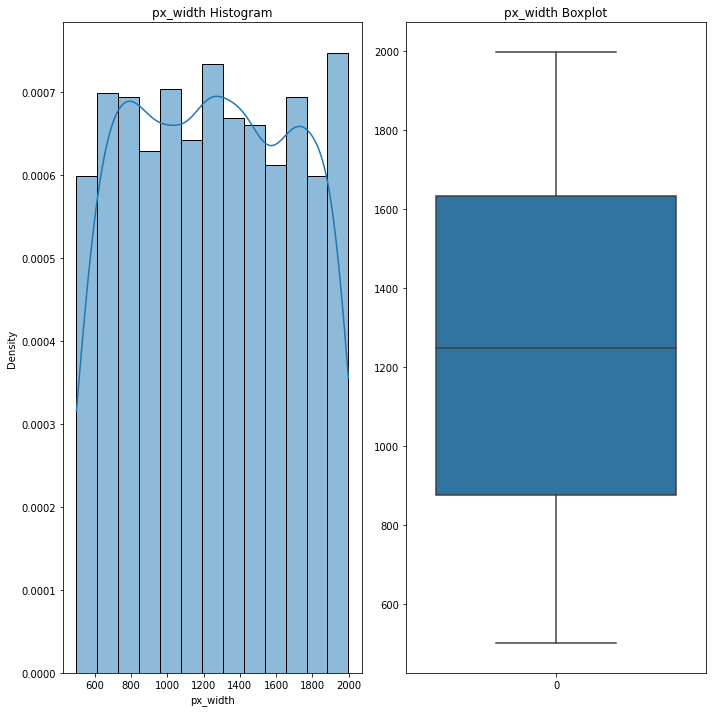

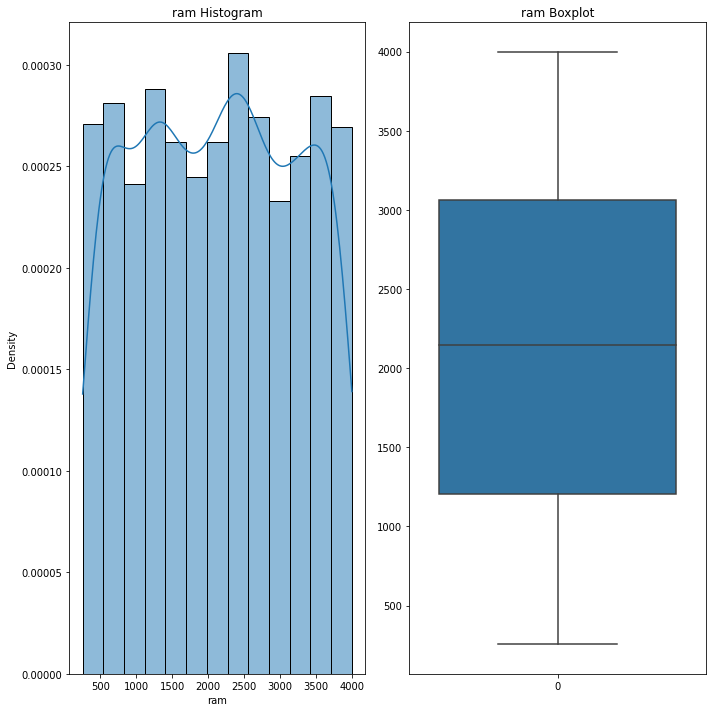

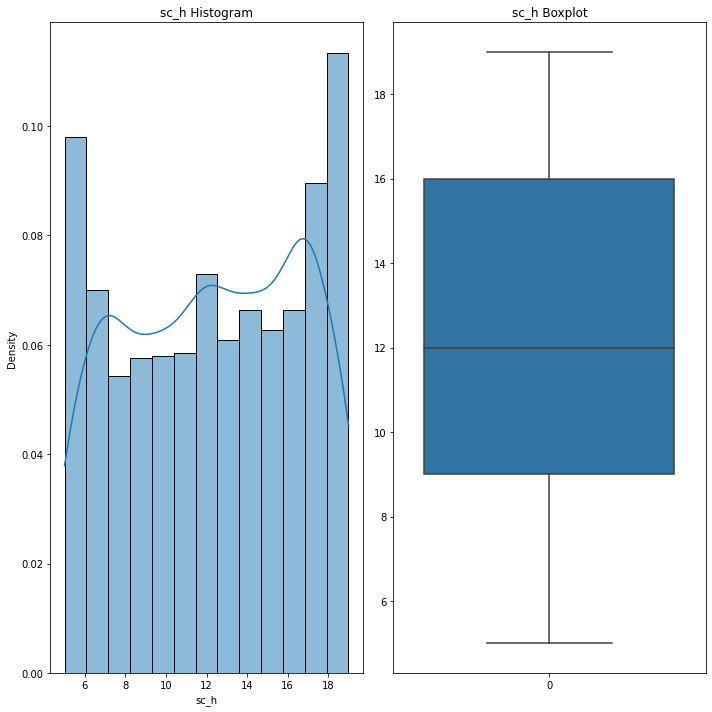

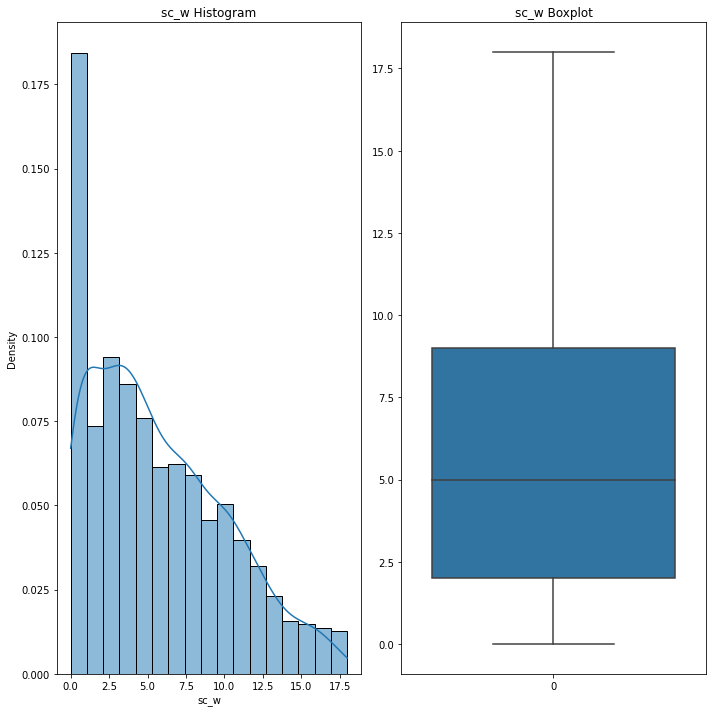

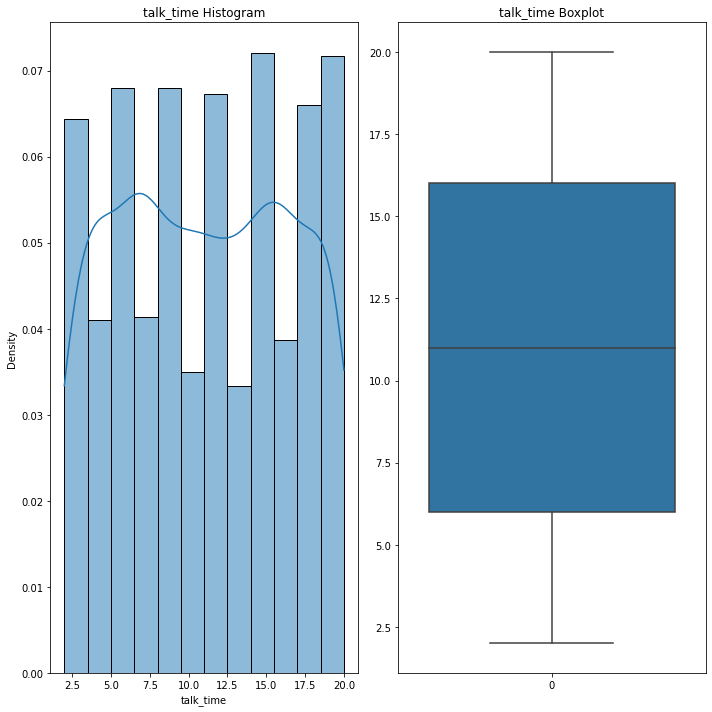

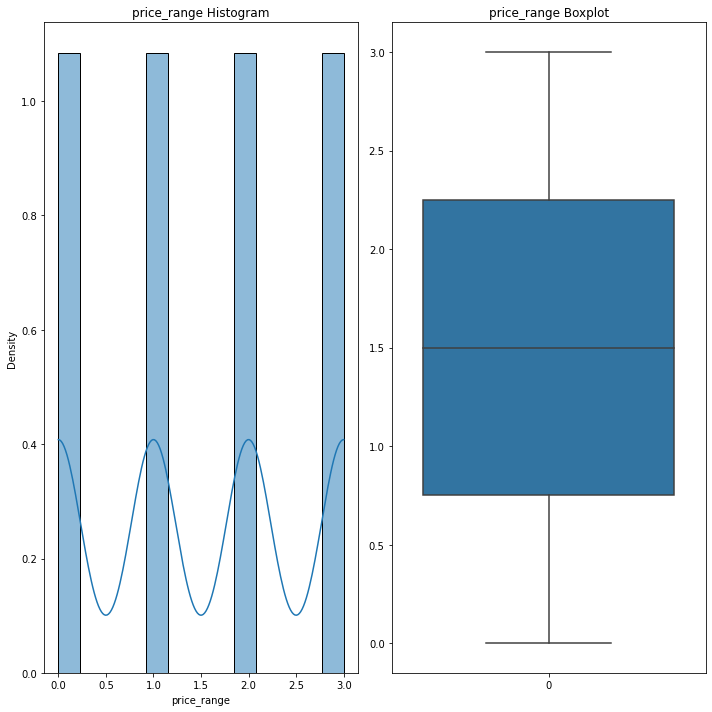

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
def plot_characteristics(data):
    for column in data.columns:
        fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
        
        sns.histplot(data=data[column],kde=True,ax=ax1,stat='density')
        ax1.set_title(f'{column} Histogram')
        
        sns.boxplot(data=data[column],ax=ax2)
        ax2.set_title(f'{column} Boxplot')
        plt.tight_layout()
    plt.show()
plot_characteristics(raw_data.drop(binary_cat_features,axis=1))

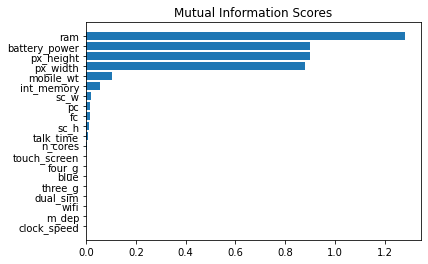

In [6]:
from sklearn.feature_selection import mutual_info_classif
y=raw_data['price_range']
X=raw_data.drop(['price_range'],axis=1)
discrete_features=X.dtypes == int
mi_scores=pd.Series(mutual_info_classif(X,y,discrete_features=discrete_features),index=X.columns,name='MI_scores').sort_values(ascending=True)
width=np.arange(len(mi_scores))
ticks=list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
plt.show()

Index(['px_width', 'px_height', 'battery_power', 'ram'], dtype='object')


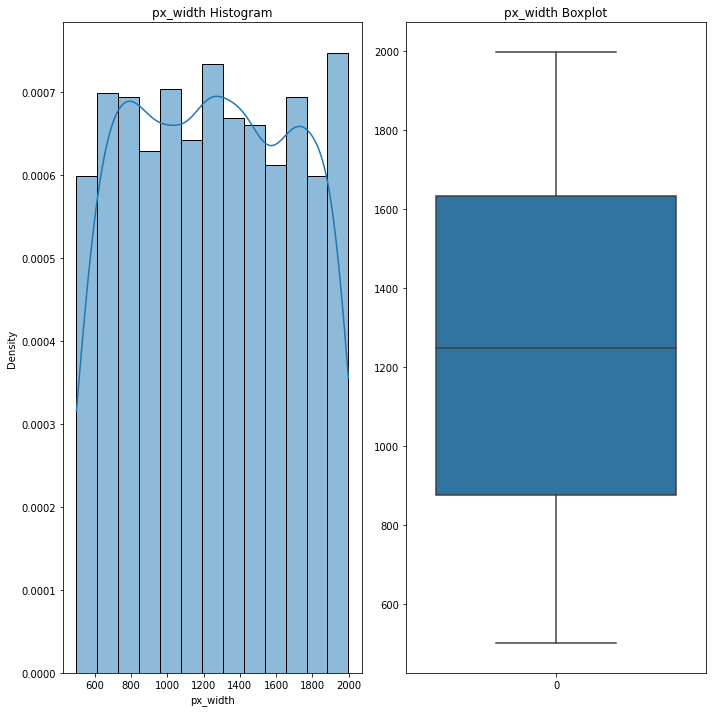

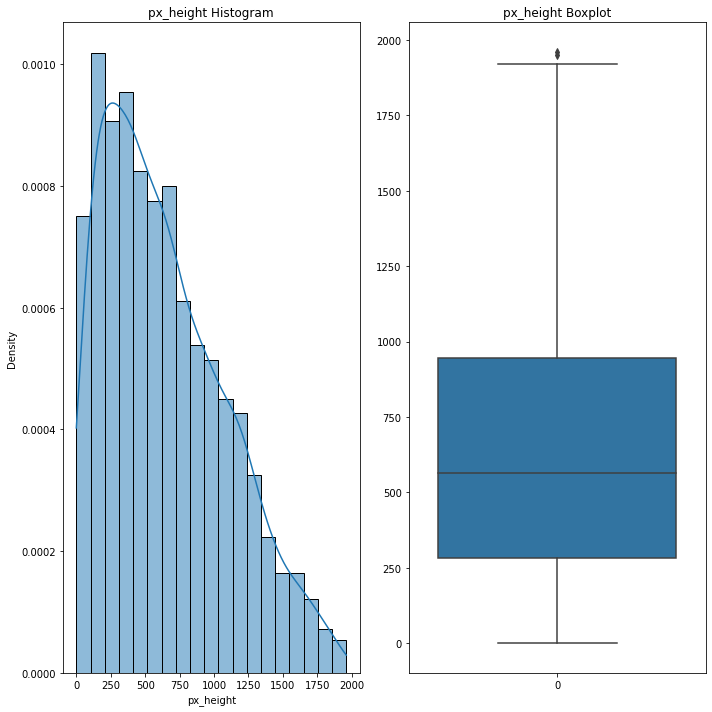

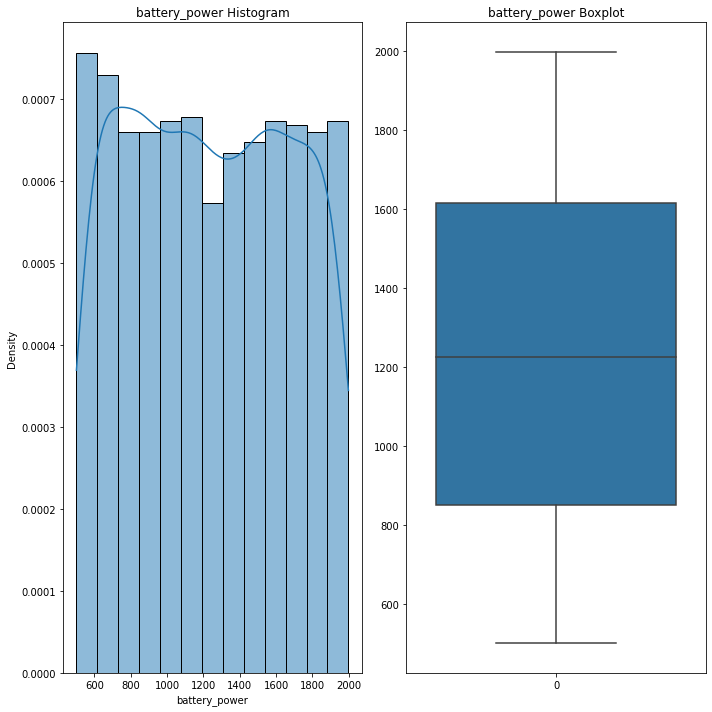

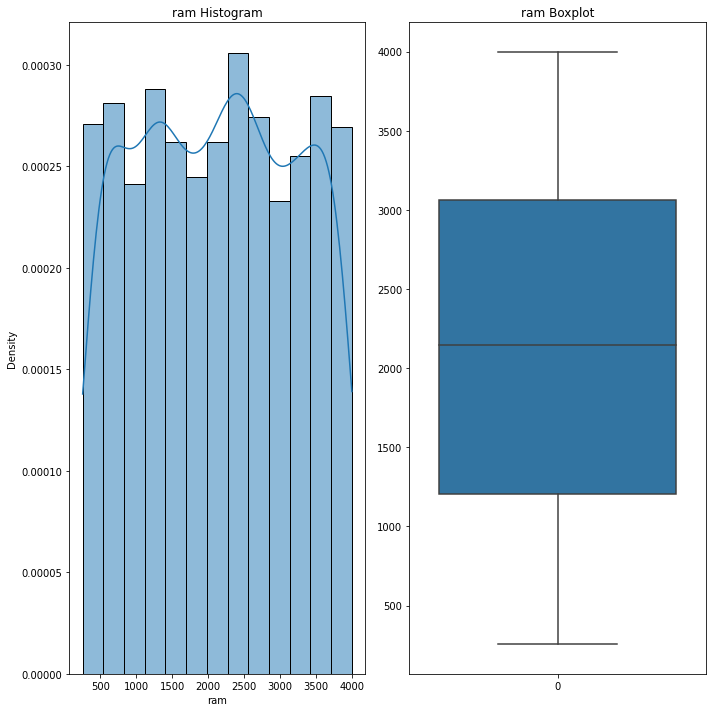

In [7]:
main_features=mi_scores[mi_scores>=0.8].index
print(main_features)
plot_characteristics(X[main_features])

In [8]:
X_with_main_features=X.loc[:,main_features]
X_with_main_features['px_area']=X_with_main_features['px_height']*X_with_main_features['px_width']
X_with_main_features=X_with_main_features.drop(['px_height','px_width'],axis=1)

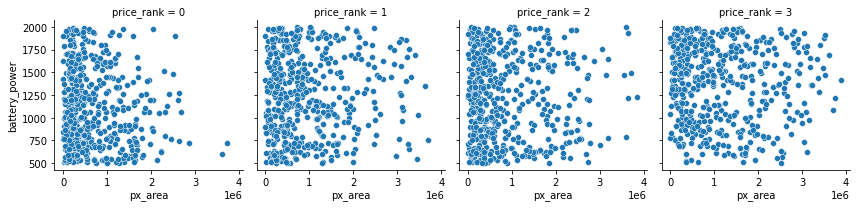

In [9]:
data_for_plot_analysis=X_with_main_features.copy()
data_for_plot_analysis['price_rank']=y
g = sns.FacetGrid(data_for_plot_analysis,col='price_rank')
g.map(sns.scatterplot, 'px_area', 'battery_power')
plt.show()

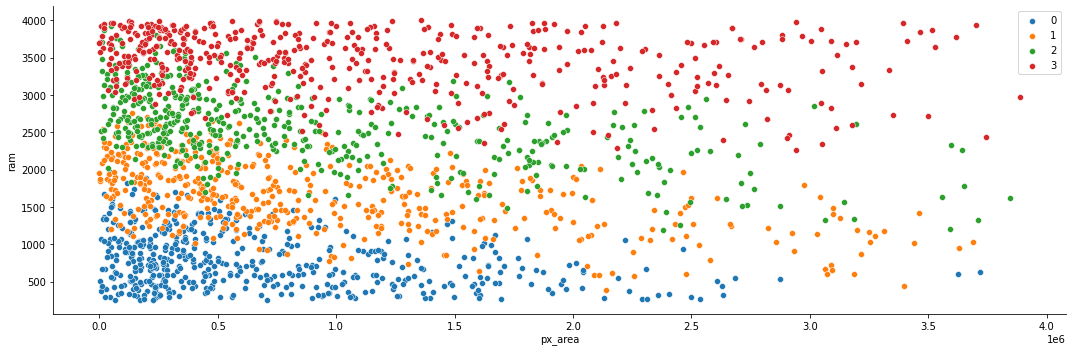

In [10]:
g = sns.FacetGrid(data_for_plot_analysis,hue='price_rank',height=5, aspect=3)
g.map(sns.scatterplot, 'px_area', 'ram')
plt.legend()
plt.show()

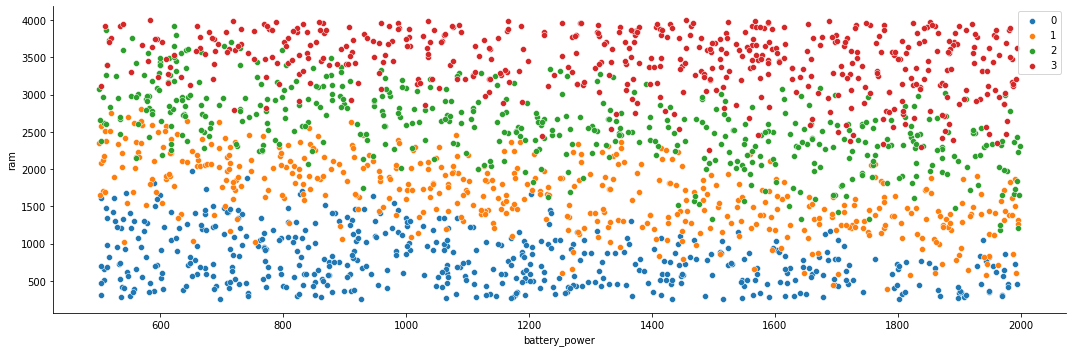

In [11]:
g = sns.FacetGrid(data_for_plot_analysis,hue='price_rank',height=5, aspect=3)
g.map(sns.scatterplot, 'battery_power', 'ram')
plt.legend()
plt.show()

2022-03-08 19:04:05.219293: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-08 19:04:05.359829: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
54/54 [==============================] - 1s 6ms/step - loss: 1.3294 - accuracy: 0.3050 - val_loss: 1.2714 - val_accuracy: 0.3875
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 1.1998 - accuracy: 0.4938 - val_loss: 1.1505 - val_accuracy: 0.5625
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 1.0744 - accuracy: 0.6100 - val_loss: 1.0301 - val_accuracy: 0.6075
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.9600 - accuracy: 0.6106 - val_loss: 0.9195 - val_accuracy: 0.6700
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.6794 - val_loss: 0.8239 - val_accuracy: 0.7200
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.7775 - val_loss: 0.7424 - val_accuracy: 0.7875
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.8056 - val_loss: 0.6767 - val_accuracy: 0.8100
Epoch 8/50
54/54 [==

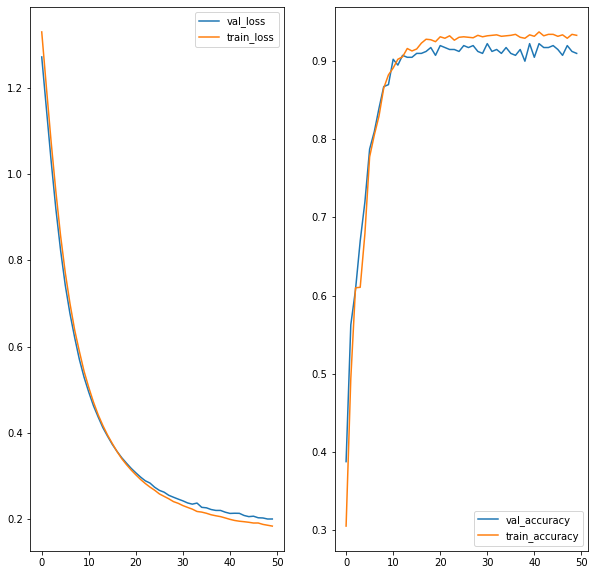

In [12]:
import tensorflow as tf 
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.layers.normalization import BatchNormalization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
preprocessor=MinMaxScaler()
for column in X_with_main_features:
    X_with_main_features[column]=preprocessor.fit_transform(np.array(X_with_main_features[column].values).reshape(-1,1))
y_train_cat=keras.utils.to_categorical(y,4)
model=keras.Sequential([Dense(100,input_shape=(1,3),activation='linear'),Dense(4,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_with_main_features,y_train_cat,batch_size=30,epochs=50,validation_split=0.2)
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(10,10))
ax1.plot(history.history['val_loss'],label='val_loss')
ax1.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_accuracy'],label='val_accuracy')
ax2.plot(history.history['accuracy'],label='train_accuracy')
ax1.legend()
ax2.legend()
plt.show()